# Import Libraries

In [30]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np
from sklearn.model_selection import train_test_split

# Load Data

In [10]:
mnist = loadmat('data/mnist-original.mat')
X = mnist['data'].T
Y = mnist['label'][0]

In [3]:
len(X)

70000

In [4]:
len(Y)

70000

# Shuffle data

In [5]:
training_data = []
for i,j in zip(X,Y):
    training_data.append((i,int(j)))

In [6]:
shuffle(training_data)

In [7]:
features = np.array([data[0] for data in training_data])
labels = np.array([data[1] for data in training_data])

# Normalize features and one hot encode labels

In [34]:
features = features/features.max()

In [49]:
def one_hot_encode(arr:np.array):
    encoded = []
    for i in arr:
        r = np.zeros(arr.max()+1)
        r[i] = 1
        encoded.append(r)
    return(np.array(encoded))

In [50]:
labels = one_hot_encode(labels)

# Divide data into training and testing sets

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42, shuffle=True)

# Visualize one datapoint

In [73]:
a = np.reshape(x_train[0], (28, 28))

Text(0.5, 1.0, '0')

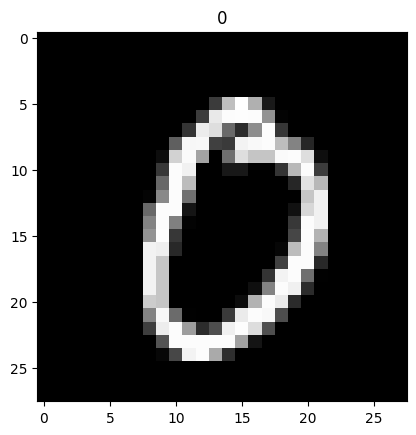

In [77]:
fig, ax = plt.subplots(1,1)
ax.imshow(a, cmap='gray')
ax.set_title(np.argmax(y_train[0]))

# Save data

In [80]:
data_list = [x_train, x_test, y_train, y_test]
names = ['x_train', 'x_test', 'y_train', 'y_test']

for i,j in zip(data_list, names):
    np.save(f'data/preprocessed/{j}', i)